# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Analysis

Trend 1

    The closer you are to the equater, the hotter it gets. 

Trend 2

    Coordinates don't seem to determine much in terms of humdidity  or windspeed. 

Trend 3
    
    Windspeeds are fairly stable throughout the wortld, with very few outliers. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key

'193421888ad09cbf01d51768678c4ba6'

## Generate Cities List

In [4]:
# empty lists for location and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_long = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['rikitea',
 'beringovskiy',
 'vaini',
 'qaanaaq',
 'svetlaya',
 'nivala',
 'kandalaksha',
 'bolonchen',
 'tiksi',
 'wakkanai',
 'deputatskiy',
 'havelock',
 'cape town',
 'constitucion',
 'isangel',
 'saint-philippe',
 'darhan',
 'laguna',
 'taolanaro',
 'khromtau',
 'tabuk',
 'shelburne',
 'georgetown',
 'maputo',
 'florianopolis',
 'hilo',
 'albany',
 'bredasdorp',
 'mataura',
 'bambous virieux',
 'huejuquilla el alto',
 'grand gaube',
 'punta arenas',
 'balkhash',
 'ushuaia',
 'kapaa',
 'bluff',
 'norman wells',
 'hermanus',
 'east london',
 'lulea',
 'belushya guba',
 'codrington',
 'mount gambier',
 'naze',
 'nikolskoye',
 'warqla',
 'dakar',
 'torbay',
 'verkhnyaya inta',
 'tecoanapa',
 'bengkulu',
 'sentyabrskiy',
 'sitka',
 'klaksvik',
 'tiznit',
 'pisco',
 'upernavik',
 'umm kaddadah',
 'orebro',
 'husavik',
 'hamilton',
 'hasaki',
 'port shepstone',
 'mar del plata',
 'cherskiy',
 'mys shmidta',
 'port elizabeth',
 'tuktoyaktuk',
 'lebu',
 'puerto ayora',
 'vila velha',
 'th

In [5]:
city_test = ['Ajax', 'Kiev', 'Kingsotn', 'Cluj-Napoca', 'Denver', 'Berlin', 'Beijing', 'Geneva', 'San Francisco', 
             'Jamaica','Jen','Beyonce', 'George', 'London']

#URL for API extraction
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="

#Empty list and value for city
c_test = []
c_number=1

#Print log 
for i in city_test:
    c_url = base_url + i
    response_t= requests.get(c_url).json()

    try:
        c_test.append(response_t['name'])
        print(f"Record {c_number} of|{i}")
        c_number +=1
        
    except:
        print(f"Not found.  Next!")
        pass

Record 1 of|Ajax
Record 2 of|Kiev
Not found.  Next!
Record 3 of|Cluj-Napoca
Record 4 of|Denver
Record 5 of|Berlin
Record 6 of|Beijing
Record 7 of|Geneva
Record 8 of|San Francisco
Record 9 of|Jamaica
Record 10 of|Jen
Not found.  Next!
Record 11 of|George
Record 12 of|London


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
#API Calls
#Perform a weather check on each city using a series of successive API calls.
#Perform a quick test by coming up with a list of cities with successive API calls.  
# Create empty lists for dataframe to plot data

city = []
temp_max = []
cloud = []
humid = []
wind = []
lat = []
long = []
date= []
country = []

print("Retreive Data")
print("..............................")

# Value for record and count
record = 1
set_number = 1

# Loop through the cities in the full cities list 
# Also, to get a print log of all the cities found 



for city in cities:
    weather_url = base_url + city
    response= requests.get(weather_url + "&units=metric").json()

    try:
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f"Getting city {record} of set {set_number}|{city}")
        
        # record and set count
        if record > 49:
            record = 1
            set_number += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
    except:
        # Append null values
        print(f"Not found. Next....")
        pass
print("-----------------------------")
print("Complete!") 
print("-----------------------------")

Retreive Data
..............................
Getting city 1 of set 1|rikitea
Not found. Next....
Getting city 2 of set 1|beringovskiy
Not found. Next....
Getting city 3 of set 1|vaini
Not found. Next....
Getting city 4 of set 1|qaanaaq
Not found. Next....
Getting city 5 of set 1|svetlaya
Not found. Next....
Getting city 6 of set 1|nivala
Not found. Next....
Getting city 7 of set 1|kandalaksha
Not found. Next....
Not found. Next....
Getting city 8 of set 1|tiksi
Not found. Next....
Getting city 9 of set 1|wakkanai
Not found. Next....
Getting city 10 of set 1|deputatskiy
Not found. Next....
Getting city 11 of set 1|havelock
Not found. Next....
Getting city 12 of set 1|cape town
Not found. Next....
Getting city 13 of set 1|constitucion
Not found. Next....
Getting city 14 of set 1|isangel
Not found. Next....
Getting city 15 of set 1|saint-philippe
Not found. Next....
Getting city 16 of set 1|darhan
Not found. Next....
Getting city 17 of set 1|laguna
Not found. Next....
Not found. Next....


Getting city 46 of set 3|ararat
Not found. Next....
Getting city 47 of set 3|maniitsoq
Not found. Next....
Getting city 48 of set 3|leo
Not found. Next....
Getting city 49 of set 3|fare
Not found. Next....
Getting city 50 of set 3|ust-kuyga
Not found. Next....
Getting city 1 of set 4|castro
Not found. Next....
Getting city 2 of set 4|sur
Not found. Next....
Getting city 3 of set 4|ponta do sol
Not found. Next....
Getting city 4 of set 4|atuona
Not found. Next....
Not found. Next....
Getting city 5 of set 4|tessalit
Not found. Next....
Getting city 6 of set 4|bambanglipuro
Not found. Next....
Getting city 7 of set 4|puerto leguizamo
Not found. Next....
Getting city 8 of set 4|college
Not found. Next....
Getting city 9 of set 4|baruun-urt
Not found. Next....
Getting city 10 of set 4|alice springs
Not found. Next....
Getting city 11 of set 4|ariquemes
Not found. Next....
Getting city 12 of set 4|eydhafushi
Not found. Next....
Getting city 13 of set 4|lugovoy
Not found. Next....
Getting ci

Getting city 46 of set 6|tabou
Not found. Next....
Getting city 47 of set 6|bereda
Not found. Next....
Getting city 48 of set 6|palora
Not found. Next....
Getting city 49 of set 6|kupang
Not found. Next....
Getting city 50 of set 6|tocopilla
Not found. Next....
Getting city 1 of set 7|lindas
Not found. Next....
Getting city 2 of set 7|san fernando
Not found. Next....
Getting city 3 of set 7|buala
Not found. Next....
Not found. Next....
Getting city 4 of set 7|beyneu
Not found. Next....
Getting city 5 of set 7|ahipara
Not found. Next....
Getting city 6 of set 7|puksoozero
Not found. Next....
Getting city 7 of set 7|zhangye
Not found. Next....
Getting city 8 of set 7|birjand
Not found. Next....
Getting city 9 of set 7|costinesti
Not found. Next....
Getting city 10 of set 7|saint-michel-des-saints
Not found. Next....
Not found. Next....
Getting city 11 of set 7|kovur
Not found. Next....
Getting city 12 of set 7|pevek
Not found. Next....
Getting city 13 of set 7|wolbrom
Not found. Next....

Not found. Next....
Getting city 43 of set 9|padre bernardo
Not found. Next....
Getting city 44 of set 9|porto torres
Not found. Next....
Not found. Next....
Getting city 45 of set 9|aswan
Not found. Next....
Not found. Next....
Getting city 46 of set 9|san vicente
Not found. Next....
Getting city 47 of set 9|shitkino
Not found. Next....
Getting city 48 of set 9|nikolsk
Not found. Next....
Getting city 49 of set 9|falmouth
Not found. Next....
Getting city 50 of set 9|pokhara
Not found. Next....
Getting city 1 of set 10|cap-aux-meules
Not found. Next....
Getting city 2 of set 10|tura
Not found. Next....
Getting city 3 of set 10|sosnovoborsk
Not found. Next....
Getting city 4 of set 10|mukhen
Not found. Next....
Getting city 5 of set 10|acarau
Not found. Next....
Getting city 6 of set 10|honiara
Not found. Next....
Getting city 7 of set 10|norway
Not found. Next....
Getting city 8 of set 10|griffith
Not found. Next....
Getting city 9 of set 10|astana
Not found. Next....
Getting city 10 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:

#Dataframe creation
weather_frame = pd.DataFrame({
    'City': city,
    'Cloudiness': cloud,
    'Country': country,
    'Date': date,
    'Humidity': humid,
    'Latitude': lat,
    'Longitude': long,
    'Max Temp': temp_max,
    'Windspeed': wind
    
})



In [68]:
weather_frame.to_csv("Output/weather_data.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
weather_frame.describe()

Cloudiness          Date    Humidity    Latitude   Longitude  \
count  551.000000  5.510000e+02  551.000000  551.000000  551.000000   
mean    45.341198  1.604805e+09   73.061706   20.597985   20.429074   
std     39.614732  9.715794e+01   19.064384   33.528004   92.323663   
min      0.000000  1.604805e+09    7.000000  -54.800000 -175.200000   
25%      1.000000  1.604805e+09   63.000000   -8.150000  -60.140000   
50%     40.000000  1.604805e+09   77.000000   27.730000   24.970000   
75%     88.500000  1.604805e+09   87.000000   48.965000  103.650000   
max    100.000000  1.604805e+09  100.000000   77.480000  179.320000   

         Max Temp   Windspeed  
count  551.000000  551.000000  
mean    13.919183    3.592976  
std     12.539537    2.593938  
min    -29.340000    0.040000  
25%      6.000000    1.725000  
50%     16.110000    3.100000  
75%     23.650000    5.045000  
max     36.000000   25.700000

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

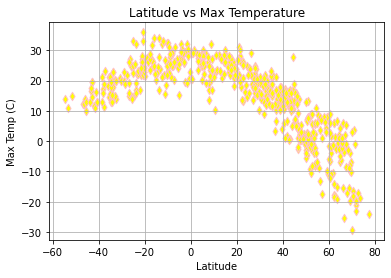

In [69]:
plt.scatter(weather_frame['Latitude'], weather_frame['Max Temp'], marker="d", facecolors="yellow", edgecolors="pink")

# Format graph
plt.title ("Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()

## Latitude vs. Humidity Plot

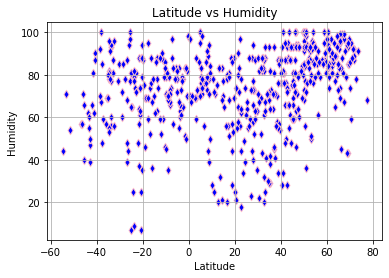

In [70]:
plt.scatter(weather_frame['Latitude'], weather_frame['Humidity'], marker="d", facecolors="blue", edgecolors="pink")

# Format graph
plt.title ("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

## Latitude vs. Cloudiness Plot

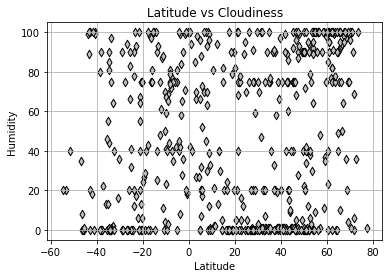

In [71]:
plt.scatter(weather_frame['Latitude'], weather_frame['Cloudiness'], marker="d", facecolors="silver", edgecolors="black")

# Format graph
plt.title ("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

## Latitude vs. Wind Speed Plot

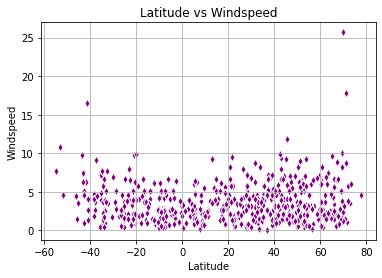

In [72]:
plt.scatter(weather_frame['Latitude'], weather_frame['Windspeed'], marker="d", facecolors="purple", edgecolors="white")

# Format graph
plt.title ("Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (km/h)")
plt.grid()

## Linear Regression

In [73]:
#create dataphrames for n and s hemispheres
n_hemisphere = weather_frame[(weather_data["Latitude"] >= 0)]
s_hemisphere = weather_frame[(weather_data["Latitude"] < 0)]
n_hemisphere
s_hemisphere

City  Cloudiness Country        Date  Humidity  Latitude  \
0    qasigiannguit         100      PF  1604805134        74    -23.12   
2    qasigiannguit          20      TO  1604804935        74    -21.20   
11   qasigiannguit          75      ZA  1604805074        93    -33.93   
12   qasigiannguit           0      CL  1604805057        69    -35.33   
13   qasigiannguit          27      VU  1604805196        75    -19.55   
..             ...         ...     ...         ...       ...       ...   
532  qasigiannguit          48      BR  1604805258        88    -12.36   
535  qasigiannguit          90      BR  1604805258       100    -25.43   
541  qasigiannguit         100      ID  1604805259        50     -0.95   
546  qasigiannguit         100      NZ  1604805260        81    -41.41   
549  qasigiannguit          61      AU  1604805260        52    -12.07   

     Longitude  Max Temp  Windspeed  
0      -134.97     22.08       7.98  
2      -175.20     27.00       4.10  
11       18.42     15.00       6.70  
12      -72.42     14.54       3.87  
13      169.27     27.01       3.91  
..         ...       ...        ...  
532     -44.97     21.20       1.34  
535     -48.71     14.00       3.10  
541     122.79     30.56       3.82  
546     175.52     11.00      16.50  
549     134.27     33.27       6.14  

[170 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation : -0.87


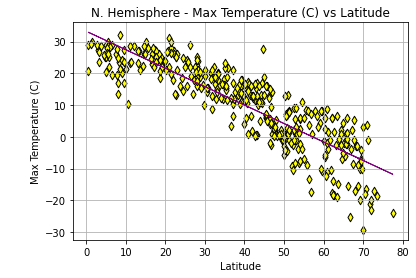

In [74]:
#create linear regression formula to apply later

def line_reg(x,y):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"Correlation : {round(rvalue,2)}")
    best_plots = x * slope + intercept
    best_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="d", facecolors="yellow", edgecolors="black")
    plt.plot(x,best_plots,linewidth = .99,color="purple")
    return best_equation

# create function to annotate
def annotate(best_equation, a, b):
    plt.annotate(best_equation,(a,b),fontsize=12)
    
    
    
# x and y values
xy = line_reg(n_hemisphere['Latitude'], n_hemisphere['Max Temp'])

# add regression formula
plt.annotate(xy,(-20,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Max Temperature (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_MaxTemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation : 0.71


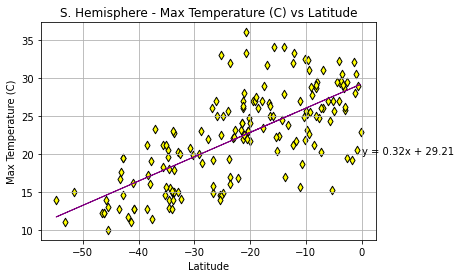

In [75]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Max Temp'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("S. Hemisphere - Max Temperature (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output/S_Hemisphere_MaxTemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation : 0.11


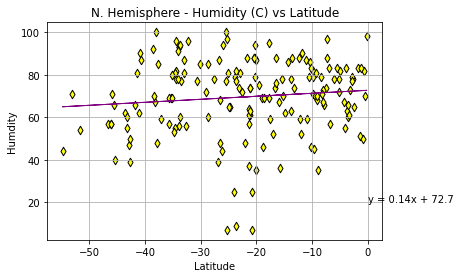

In [76]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Humidity'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Humidity (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humdity %")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output/N_Hemisphere_Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation : 0.11


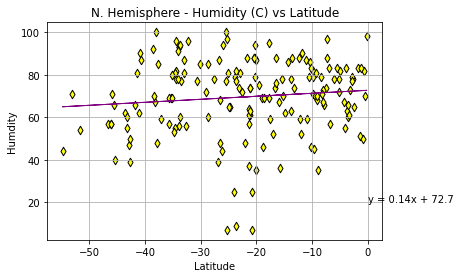

In [77]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Humidity'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Humidity (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humdity %")
plt.grid()

# Save 
plt.savefig("Output/S_Hemisphere_Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation : 0.23


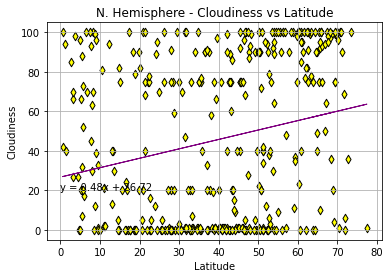

In [78]:
# x and y values
xy = line_reg(n_hemisphere['Latitude'], n_hemisphere['Cloudiness'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid()

# Save 
plt.savefig("Output/N_Hemisphere_Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation : 0.24


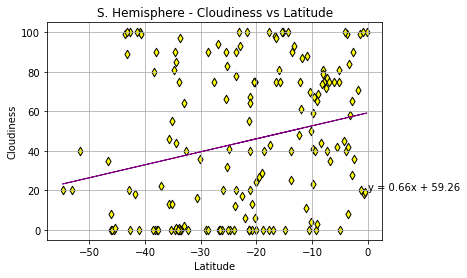

In [79]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Cloudiness'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("S. Hemisphere - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid()

# Save 
plt.savefig("Output/S_Hemisphere_Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation : 0.15


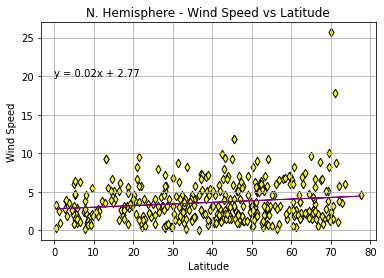

In [80]:
# x and y values
xy = line_reg(n_hemisphere['Latitude'], n_hemisphere['Windspeed'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid()

# Save 
plt.savefig("Output/N_Hemisphere_Windspeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation : -0.3


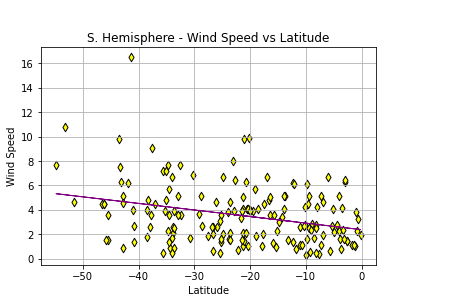

In [81]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Windspeed'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("S. Hemisphere - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Km/h)")
plt.grid()

# Save 
plt.savefig("Output/S_Hemisphere_Windspeed")